In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.svm import SVC


C:\Users\jarves\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
os.chdir('C:/Users/jarves/Desktop/Machine Learning/Andrew NG/ex6')

# Classification using Linear SVM


In [5]:
data = sio.loadmat('ex6data1')
print(type(data))

<class 'dict'>


In [6]:
X = data['X']  # 51 x 2 matrix
y = data['y']

In [7]:
print(X.shape)
print(y.shape)

(51, 2)
(51, 1)


(1.5, 5)

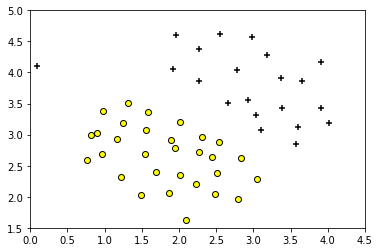

In [8]:
pos = (y==1).ravel() #flattens i.e. makes 1d array
neg = (y==0).ravel() ##alternative code neg = np.array([X[i] for i in xrange(X.shape[0]) if y[i] == 0])
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(0, 4.5)
plt.ylim(1.5, 5)

Training Linear SVM ...



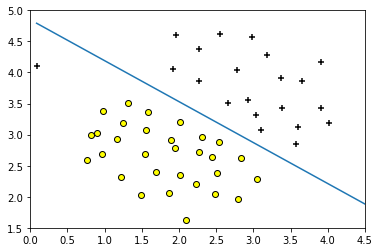

[1.40718563 2.13398052]
-10.348897779877271


In [9]:
print('Training Linear SVM ...\n')
C = 1  #default
svm = SVC(kernel='linear', C=C)
svm.fit(X, y.ravel())
weights = svm.coef_[0]
intercept = svm.intercept_[0]
#draw svm boundary
xp = np.linspace(X.min(), X.max(), 100)
yp = - (weights[0] * xp + intercept) / weights[1]

pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.plot(xp, yp)
plt.xlim(0, 4.5)
plt.ylim(1.5, 5)
plt.show()
print(weights)
print(intercept)

# Part - 2  Gaussian Kernel

In [11]:
#Gaussian Kernel
#linalg.norm returns one of seven different matrix norms
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- (np.linalg.norm(x1 - x2) ** 2).sum() / (2 * (sigma ** 2)))

In [13]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {0} :\n'
.format(sigma),
    '\t{0:.6f}\n(for sigma = 2, this value should be about 0.324652)'
    .format(sim))


plt.close()


Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 :
 	0.324652
(for sigma = 2, this value should be about 0.324652)


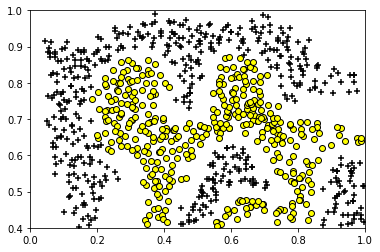

In [14]:
#Visualizing Dataset 2 
data = sio.loadmat('ex6data2.mat')
X = data['X']  # 863 x 2 matrix
y = data['y']  # 863 x 1 matrix

pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(0, 1)
plt.ylim(0.4, 1)
plt.show()

In [15]:
#RBF Kernel (Dataset 2)
print('Training SVM with RBF Kernel ...\n')

C = 30
sigma = 30

svm = SVC(kernel='rbf', C=C, gamma=sigma)
svm.fit(X, y.ravel())

Training SVM with RBF Kernel ...



SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

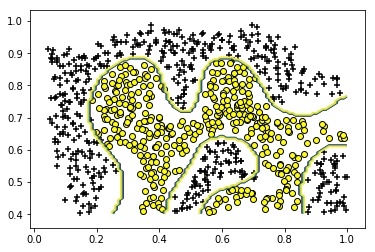

In [16]:
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
#plt.xlim(0, 1)
#plt.ylim(0.4, 1)
plt.contour(x1, x2, yp)
plt.show()

# (Part 3) Finding the right C and Sigma

In [17]:
# Visualizing Dataset 3 
data = sio.loadmat('ex6data3.mat')
X = data['X']  # 211 x 2 matrix
y = data['y']  # 211 x 1 matrix
Xval = data['Xval']  # 200 x 2 matrix
yval = data['yval']  # 200 x 1 matrix



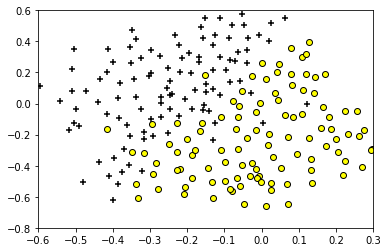

In [19]:
pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(-0.6, 0.3)
plt.ylim(-0.8, 0.6)
plt.show()


In [34]:
# RBF Kernel (Dataset 3)
C, sigma = dataset3_params(X, y, Xval, yval)

svm = SVC(kernel='rbf', C=C, gamma=sigma)
svm.fit(X, y.ravel())

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)


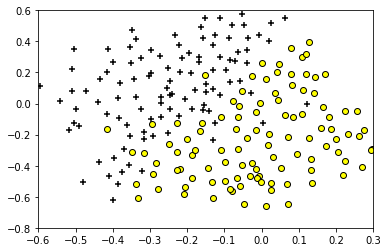

In [35]:
pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
#plt.xlim(-0.6, 0.3)
#plt.ylim(-0.8, 0.6)


# Part4(Spam classification)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
from sklearn import svm
import re 
import nltk, nltk.stem.porter

In [24]:
## Sample of the email

"""
Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..
To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com
"""

"\nAnyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n"

In [32]:
def preProcess( email ):
    email = email.lower()
    # Strip html tags. replace with a space
    email = re.sub('<[^<>]+>', ' ', email);
    #Any numbers get replaced with the string 'number'
    email = re.sub('[0-9]+', 'number', email)
    #Anything starting with http or https:// replaced with 'httpaddr'
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email)
    #Strings with "@" in the middle are considered emails --> 'emailaddr'
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email);
    #The '$' sign gets replaced with 'dollar'
    email = re.sub('[$]+', 'dollar', email);
    return email

def getVocabDict(reverse=False):
    """
    Function to read in the supplied vocab list text file into a dictionary
    Dictionary key is the stemmed word, value is the index in the text file
    If "reverse", the keys and values are switched.
    """
    vocab_dict = {}
    with open("vocab.txt") as f:
        for line in f:
            (val, key) = line.split()
            if not reverse:
                vocab_dict[key] = int(val)
            else:
                vocab_dict[int(val)] = key
                
    return vocab_dict

In [33]:
def email2TokenList( raw_email ):
    """
    Function that takes in preprocessed (simplified) email, tokenizes it,
    stems each word, and returns an (ordered) list of tokens in the e-mail
    """
    
    stemmer = nltk.stem.porter.PorterStemmer()
    email = preProcess( raw_email )

    #Split the e-mail into individual words (tokens) (split by the delimiter ' ')
    #Splitting by many delimiters is easiest with re.split()
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', email)
    
    #Loop over each token and use a stemmer to shorten it, check if the word is in the vocab_list... if it is, store index
    tokenlist = []
    for token in tokens:
      
        token = re.sub('[^a-zA-Z0-9]', '', token);
        stemmed = stemmer.stem( token )
        #Throw out empty tokens
        if not len(token): continue
        #Store a list of all unique stemmed words
        tokenlist.append(stemmed)
            
    return tokenlist


In [34]:
def email2VocabIndices( raw_email, vocab_dict ):
    #returns a list of indices corresponding to the location in vocab_dict for each stemmed word 
    tokenlist = email2TokenList( raw_email )
    index_list = [ vocab_dict[token] for token in tokenlist if token in vocab_dict ]
    return index_list
	
#feature extraction

def email2FeatureVector( raw_email, vocab_dict ):
    # returns a vector of shape(n,1) where n is the size of the vocab_dict.
    #he first element in this vector is 1 if the vocab word with index == 1 is in raw_email, else 0
    n = len(vocab_dict)
    result = np.zeros((n,1))
    vocab_indices = email2VocabIndices( email_contents, vocab_dict )
    for idx in vocab_indices:
        result[idx] = 1
    return result


vocab_dict = getVocabDict()
email_contents = open( 'emailSample1.txt', 'r' ).read()
test_fv = email2FeatureVector( email_contents, vocab_dict )

print("Length of feature vector is %d" % len(test_fv))
print("Number of non-zero entries is: %d" % sum(test_fv==1))

Length of feature vector is 1899
Number of non-zero entries is: 45


In [36]:
#svm for spam classification
datafile = 'spamTrain.mat'
mat = scipy.io.loadmat(datafile)
X, y = mat['X'], mat['y']
# Test set
datafile = 'spamTest.mat'
mat = scipy.io.loadmat(datafile)
Xtest, ytest = mat['Xtest'], mat['ytest']


In [39]:
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
print('Total number of training emails = ',X.shape[0])
print('Number of training spam emails = ',pos.shape[0])
print('Number of training nonspam emails = ',neg.shape[0])



Total number of training emails =  4000
Number of training spam emails =  1277
Number of training nonspam emails =  2723


In [41]:
# First we make an instance of an SVM with C=0.1 and 'linear' kernel
linear_svm = svm.SVC(C=0.1, kernel='linear')

# Now we fit the SVM to our X matrix, given the labels y
linear_svm.fit( X, y.flatten() )

#  training accuracy of about 99.8% and a test accuracy of about 98.5%"

train_predictions = linear_svm.predict(X).reshape((y.shape[0],1))
train_acc = 100. * float(sum(train_predictions == y))/y.shape[0]
print('Training accuracy = %0.2f%%' % train_acc)

test_predictions = linear_svm.predict(Xtest).reshape((ytest.shape[0],1))
test_acc = 100. * float(sum(test_predictions == ytest))/ytest.shape[0]
print('Test set accuracy = %0.2f%%' % test_acc)


Training accuracy = 99.83%
Test set accuracy = 98.90%


In [44]:
# Determine the words most likely to indicate an e-mail is a spam
# From the trained SVM we can get a list of the weight coefficients for each
# word (technically, each word index)

vocab_dict_flipped = getVocabDict(reverse=True)

#Sort indicies from most important to least-important (high to low weight)
sorted_indices = np.argsort( linear_svm.coef_, axis=None )[::-1]
print("The 15 most important words to classify a spam e-mail are:")
print([ vocab_dict_flipped[x] for x in sorted_indices[:15]])
print("The 15 least important words to classify a spam e-mail are:")
print([ vocab_dict_flipped[x] for x in sorted_indices[-15:]])


# Most common word (mostly to debug):
most_common_word = vocab_dict_flipped[sorted_indices[0]]
print('# of spam containing \"%s\" = %d/%d = %0.2f%%'% \
    (most_common_word, sum(pos[:,1190]),pos.shape[0],  \
     100.*float(sum(pos[:,1190]))/pos.shape[0]))
print('# of NON spam containing \"%s\" = %d/%d = %0.2f%%'% \
    (most_common_word, sum(neg[:,1190]),neg.shape[0],      \
     100.*float(sum(neg[:,1190]))/neg.shape[0]))

The 15 most important words to classify a spam e-mail are:
['otherwis', 'clearli', 'remot', 'gt', 'visa', 'base', 'doesn', 'wife', 'previous', 'player', 'mortgag', 'natur', 'll', 'futur', 'hot']
The 15 least important words to classify a spam e-mail are:
['http', 'toll', 'xp', 'ratio', 'august', 'unsubscrib', 'useless', 'numberth', 'round', 'linux', 'datapow', 'wrong', 'urgent', 'that', 'spam']
# of spam containing "otherwis" = 804/1277 = 62.96%
# of NON spam containing "otherwis" = 301/2723 = 11.05%
